In [2]:
"""
s = mybasel(N)

Calculate finite bessel sum
"""

function mybasel(N)
    s=0.0
    for n = 1:N
        s += 1/n^2
    end
    return s
end

mybasel (generic function with 1 method)

In [3]:
round(abs(mybasel(2000)-pi^2/6), sigdigits=1)

0.0005

In [4]:

function myrichardson(N)
    s1 = mybasel(N)
    s2 = mybasel(2*N)
    return 2*s2 - s1
end

myrichardson (generic function with 1 method)

In [5]:
round(abs(myrichardson(1000) - pi^2/6), sigdigits=1)

2.0e-7

In [6]:
round(abs(mybasel(5000000) - pi^2/6), sigdigits=1)

2.0e-7

In [7]:
] add QuadGK

   Resolving package versions...
  No Changes to `/workspaces/phys2200-lectures-mis16121/Project.toml`
  No Changes to `/workspaces/phys2200-lectures-mis16121/Manifest.toml`


In [8]:

using QuadGK

In [9]:
fun1(x) = 1/sqrt(x)

fun1 (generic function with 1 method)

In [10]:
round(quadgk(fun1, 0, 1)[1], sigdigits=5)

2.0

In [11]:
fun2(x)=exp(-x) * log(x)

fun2 (generic function with 1 method)

In [12]:
round(quadgk(fun2, 0, Inf)[1], sigdigits=5)

-0.57722

# Eulers method for IVP

In [13]:

"""
    t, y = myeulers(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a vector of correspondinig values
of the solution, y(t_i)
"""

function myeulers(fun, a, b, n, y1)
    t =range(a,b,n)
    y =zeros(n)
    h = t[2]-t[1]
    y[1]= y1

    for i = 1:(n-1)
        y[i+1] = y[i] + h*fun(t[i],y[i])
    end
    return t,y
        #yc, yp = yc+h*fun() ,yp
end

myeulers (generic function with 1 method)

In [14]:
function myeulers2(fun, a, b, n, y1)
    t =range(a,b,n)
    y =zeros(n)
    h = t[2]-t[1]
    y[1]= y1
    
    for i = 1:n
        yc=y[2]
        yp=[1]
        yc , yp = yc+h*fun(t[i],y[i]),yp
    end
    return t2, y2
end

myeulers2 (generic function with 1 method)

In [15]:

a = 0
b = 5.0
n = 64
y1=0
fun(t, y) = exp(-sin(t)) - y * cos(t)
yexact(t)=t * exp(-sin(t))

yexact (generic function with 1 method)

In [16]:

t, y = myeulers(fun,a,b,n,y1)

(0.0:0.07936507936507936:5.0, [0.0, 0.07936507936507936, 0.14640193018250997, 0.20269028461468805, 0.2497478530729569, 0.28900181860488144, 0.32177099820448435, 0.34925697539482514, 0.3725424425763906, 0.3925950689158003  …  9.922618991205706, 10.445763430536573, 10.931171825013662, 11.369030734090003, 11.750125683122171, 12.066226287320763, 12.310447408013015, 12.477561679832434, 12.56424103542065, 12.569209387626104])

In [21]:
#t2, y2 = myeulers2(fun,a,b,n,y1)

In [18]:
using PyPlot

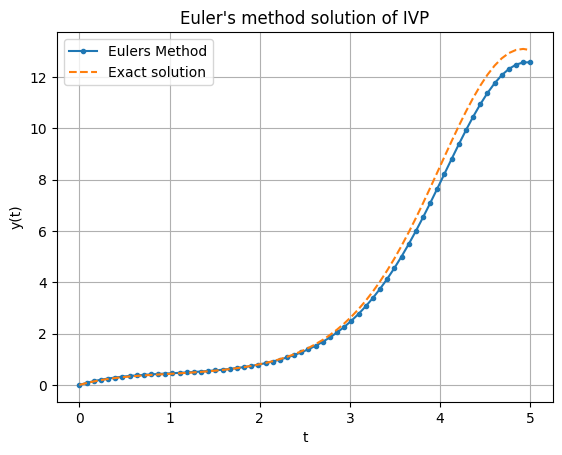

In [19]:
plot(t,y,label="Eulers Method", marker=".")
plot(t, yexact.(t), label="Exact solution", linestyle="dashed")
xlabel("t")
ylabel("y(t)")
title("Euler's method solution of IVP")
legend();
grid(true)

In [22]:

np = 9
hh = zeros(np)
gerr = zeros(np)

for i = 1:np
    n=2^(i+3)
  t, y = myeulers(fun,a,b,n,y1)
    hh[i]=t[2]-t[1]
    gerr[i]=abs(yexact(b) - y[end])
end

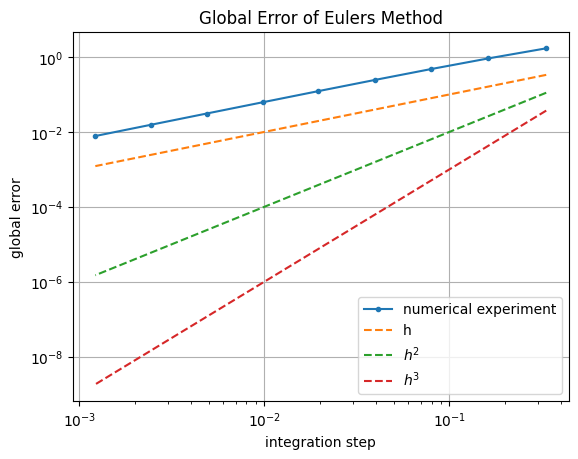

In [28]:
loglog(hh, gerr, marker =".", label="numerical experiment")
loglog(hh, hh, linestyle="dashed", label="h")
loglog(hh, hh.^2, linestyle="dashed", label=L"h^2")
loglog(hh, hh.^3, linestyle="dashed", label=L"h^3")
grid(true)
title("Global Error of Eulers Method")
xlabel("integration step")
ylabel("global error")
legend();